In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


sns.set(style="ticks", palette="colorblind")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

%matplotlib inline

# Analysis Framework
## A. Exploratory Analysis
    1. User Analysis
        1.1 New User Analysis
        1.2 Pay User Analysis
        1.3 Active User Analysis
        
    2. Retention Analysis
        2.1 2/3/7 day retention 
        2.2 Pay user retention
        
    3. Profit Analysis
        3.1 Macro Profit
        3.2 Conversion
        3.3 APRU/ARPPU/APA
        
    4. Content Analysis
        4.1 Item Usage (pay/unpay user)
        4.2 PVP/PVE (pay/unpay user)
        4.3 online minutes (pay/unpay user)
        
## B. Prediction Model Implementation 
    5. prediction on 45days paying based on 7 day

# Dataset Description
    user_id == player ID
    register_time == regitration time stamp
    bd_stronghold_level	== building_stronghold_level
    pvp_battle_count ==	player vs player battle count
    pvp_lanch_count	== PVP intiative count
    pvp_win_count == pvp win count
    pve_battle_count ==	player vs enviornment count
    pve_lanch_count	== PVE intiative count
    pve_win_count == PVE win count
    avg_online_minutes == average online time in minutes
    pay_price == paid amount in 7 days
    pay_count == paid freq
    prediction_pay_price == prediction of paid amount in 45 days

# Data Loading, Cleaning and Preperation

In [2]:
df_train = pd.read_csv('tap_fun_train.csv')
df_train.head(5)

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,infantry_add_value,infantry_reduce_value,cavalry_add_value,cavalry_reduce_value,shaman_add_value,shaman_reduce_value,wound_infantry_add_value,wound_infantry_reduce_value,wound_cavalry_add_value,wound_cavalry_reduce_value,wound_shaman_add_value,wound_shaman_reduce_value,general_acceleration_add_value,general_acceleration_reduce_value,building_acceleration_add_value,building_acceleration_reduce_value,reaserch_acceleration_add_value,reaserch_acceleration_reduce_value,training_acceleration_add_value,training_acceleration_reduce_value,treatment_acceleraion_add_value,treatment_acceleration_reduce_value,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,bd_watchtower_level,bd_magic_coin_tree_level,bd_hall_of_war_level,bd_market_level,bd_hero_gacha_level,bd_hero_strengthen_level,bd_hero_pve_level,sr_scout_level,sr_training_speed_level,sr_infantry_tier_2_level,sr_cavalry_tier_2_level,sr_shaman_tier_2_level,sr_infantry_atk_level,sr_cavalry_atk_level,sr_shaman_atk_level,sr_infantry_tier_3_level,sr_cavalry_tier_3_level,sr_shaman_tier_3_level,sr_troop_defense_level,sr_infantry_def_level,sr_cavalry_def_level,sr_shaman_def_level,sr_infantry_hp_level,sr_cavalry_hp_level,sr_shaman_hp_level,sr_infantry_tier_4_level,sr_cavalry_tier_4_level,sr_shaman_tier_4_level,sr_troop_attack_level,sr_construction_speed_level,sr_hide_storage_level,sr_troop_consumption_level,sr_rss_a_prod_levell,sr_rss_b_prod_level,sr_rss_c_prod_level,sr_rss_d_prod_level,sr_rss_a_gather_level,sr_rss_b_gather_level,sr_rss_c_gather_level,sr_rss_d_gather_level,sr_troop_load_level,sr_rss_e_gather_level,sr_rss_e_prod_level,sr_outpost_durability_level,sr_outpost_tier_2_level,sr_healing_space_level,sr_gathering_hunter_buff_level,sr_healing_speed_level,sr_outpost_tier_3_level,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,50,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [3]:
df_train.shape

(2288007, 109)

In [4]:
df_train.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Data columns (total 109 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   user_id                              int64  
 1   register_time                        object 
 2   wood_add_value                       float64
 3   wood_reduce_value                    float64
 4   stone_add_value                      float64
 5   stone_reduce_value                   float64
 6   ivory_add_value                      float64
 7   ivory_reduce_value                   float64
 8   meat_add_value                       float64
 9   meat_reduce_value                    float64
 10  magic_add_value                      float64
 11  magic_reduce_value                   float64
 12  infantry_add_value                   int64  
 13  infantry_reduce_value                int64  
 14  cavalry_add_value                    int64  
 15  cavalry_reduce_value           

In [5]:
df_train['register_time'] = pd.to_datetime(df_train['register_time'])

In [6]:
df_train.isnull().sum()
# by looking at the dataset, it is reasonably clean to prepared. We will do adjustment later if needed. 

user_id                                0
register_time                          0
wood_add_value                         0
wood_reduce_value                      0
stone_add_value                        0
stone_reduce_value                     0
ivory_add_value                        0
ivory_reduce_value                     0
meat_add_value                         0
meat_reduce_value                      0
magic_add_value                        0
magic_reduce_value                     0
infantry_add_value                     0
infantry_reduce_value                  0
cavalry_add_value                      0
cavalry_reduce_value                   0
shaman_add_value                       0
shaman_reduce_value                    0
wound_infantry_add_value               0
wound_infantry_reduce_value            0
wound_cavalry_add_value                0
wound_cavalry_reduce_value             0
wound_shaman_add_value                 0
wound_shaman_reduce_value              0
general_accelera

## 1. User Analysis
### 1.1 New Registered User

In [7]:
# seperate datetime by month, day, weekday for later analysis
df_train['register_time_month'] = df_train['register_time'].dt.month
df_train['register_time_day'] = df_train['register_time'].dt.day
df_train['register_time_weekday'] = df_train['register_time'].dt.weekday
df_train.head(100)

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,infantry_add_value,infantry_reduce_value,cavalry_add_value,cavalry_reduce_value,shaman_add_value,shaman_reduce_value,wound_infantry_add_value,wound_infantry_reduce_value,wound_cavalry_add_value,wound_cavalry_reduce_value,wound_shaman_add_value,wound_shaman_reduce_value,general_acceleration_add_value,general_acceleration_reduce_value,building_acceleration_add_value,building_acceleration_reduce_value,reaserch_acceleration_add_value,reaserch_acceleration_reduce_value,training_acceleration_add_value,training_acceleration_reduce_value,treatment_acceleraion_add_value,treatment_acceleration_reduce_value,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,bd_watchtower_level,bd_magic_coin_tree_level,bd_hall_of_war_level,bd_market_level,bd_hero_gacha_level,bd_hero_strengthen_level,bd_hero_pve_level,sr_scout_level,sr_training_speed_level,sr_infantry_tier_2_level,sr_cavalry_tier_2_level,sr_shaman_tier_2_level,sr_infantry_atk_level,sr_cavalry_atk_level,sr_shaman_atk_level,sr_infantry_tier_3_level,sr_cavalry_tier_3_level,sr_shaman_tier_3_level,sr_troop_defense_level,sr_infantry_def_level,sr_cavalry_def_level,sr_shaman_def_level,sr_infantry_hp_level,sr_cavalry_hp_level,sr_shaman_hp_level,sr_infantry_tier_4_level,sr_cavalry_tier_4_level,sr_shaman_tier_4_level,sr_troop_attack_level,sr_construction_speed_level,sr_hide_storage_level,sr_troop_consumption_level,sr_rss_a_prod_levell,sr_rss_b_prod_level,sr_rss_c_prod_level,sr_rss_d_prod_level,sr_rss_a_gather_level,sr_rss_b_gather_level,sr_rss_c_gather_level,sr_rss_d_gather_level,sr_troop_load_level,sr_rss_e_gather_level,sr_rss_e_prod_level,sr_outpost_durability_level,sr_outpost_tier_2_level,sr_healing_space_level,sr_gathering_hunter_buff_level,sr_healing_speed_level,sr_outpost_tier_3_level,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price,register_time_month,register_time_day,register_time_weekday
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,50,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333333,0.00,0,0.00,2,2,4
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333333,0.00,0,0.00,1,26,4
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.166667,0.00,0,0.00,1,26,4
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.166667,0.00,0,0.00,1,26,4
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.333333,0.00,0,0.00,1,26,4
5,1597,2018-01-26 00:03:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

AttributeError: 'Text' object has no property 'fontszie'

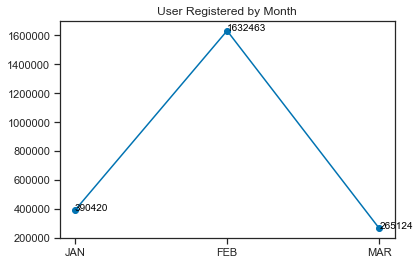

In [8]:
# user registered count by month
month_x = df_train['register_time'].dt.month.unique()
month_y = df_train['user_id'].groupby(df_train['register_time'].dt.month).count()
user_month = plt.plot(sorted(month_x), month_y, marker='o')
plt.xticks([1, 2, 3], ['JAN', 'FEB', 'MAR'])
for x, y in zip (sorted(month_x), month_y):
    plt.text(x, y, str(y), c='black')

plt.title('User Registered by Month', fontszie=15)

In [ ]:
# user registered count by weekday
import calendar
calendar.setfirstweekday(calendar.SUNDAY)

weekday_x = sorted(df_train['register_time'].dt.weekday.unique())
weekday_y = df_train['user_id'].groupby(df_train['register_time'].dt.weekday).count()
user_month = plt.plot(weekday_x, weekday_y, marker='o')
plt.xticks([1, 2, 3, 4, 5, 6, 0], list(calendar.day_abbr))

plt.title('User Registered by Weekday', fontsize=15)

In [ ]:
import matplotlib.dates as mdates

In [ ]:
# user registered count by day

fig, ax = plt.subplots(figsize=(20, 10))

day_x = sorted(df_train['register_time'].dt.strftime('%m%d').unique())
day_y = df_train['user_id'].groupby(df_train['register_time'].dt.strftime('%m%d')).count()
day_avg = sum(day_y) / len(day_x)
ax.plot_date(day_x, day_y, linestyle='solid')

#add average user registered
plt.axhline(y=day_avg, linestyle = '--', color='red')

#format
fig.autofmt_xdate()
ax.set_title('User Register by Day', fontsize=15)

### Insight of New User Analysis
    1. The data is not complete since it only shows a few days of Janurary and March. The data can only be used to generate some insights on Feburary.
    
    2. By looking at Feburary data, clearly states that there's some promotional events going on between 17th to 21st, result in huge increase (almost 2x) in user registered and quickly dropped to lower level. We should investigate more to see the quality of these user registration. 
    
    3. Saturday and Sunday are clearly the winner among weekdays to do promotion events. 
    

#### 1.2 Pay User Analysis

In [ ]:
# count of paying user vs unpay user
pay_count = df_train['pay_count'][df_train['pay_count'] > 0].count()
unpay_count = df_train['pay_count'][df_train['pay_count'] <= 0].count()

pay_data = {'Pay_user' : pay_count, 'Unpay_user' : unpay_count}
names = list(pay_data.keys())
values = list(pay_data.values())

fig, ax1 = plt.subplots()
bar = ax1.bar(names, values, align='center')
ax1.set_title('Paid User vs Unpaid User', fontsize=15)  

# adding value annotation
for i, v in enumerate(values):
    plt.text(i-0.1, v, str(v))
    
  
plt.show()

In [ ]:
# percentage of paying user vs unpay user
pay_pct = (df_train['pay_count'][df_train['pay_count'] > 0].count() / df_train['pay_count'].count())

unpay_pct = df_train['pay_count'][df_train['pay_count'] <= 0].count() /df_train['pay_count'].count()

pay_data = {'Pay_pct' : pay_pct, 'Unpay_pct' : unpay_pct}
names = list(pay_data.keys())
values = list(pay_data.values())

fig, ax = plt.subplots()
bar = ax.bar(names, values, align='center')
ax.set_title('Paid User vs Unpaid User in %', fontsize=15)  

# adding value annotation
for i, v in enumerate(values):
    plt.text(i-0.1, v, '{0:.2%}'.format(v)) #percentagize the value
    
    
plt.show()

In [ ]:
#combined visualization of new user registered and pay count
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
x = day_x
y1 = day_y
y2 = df_train['pay_count'][df_train['pay_count'] > 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()
ax.set_ylabel('User Count')
ax.set_xlabel('day')
ax.plot(x, y1, linestyle='-')
ax.set_title('User Registration and Pay Count', fontsize=15)

ax2 = ax.twinx()
ax2.plot(x, y2, linestyle='--', c='r')
ax2.set_ylabel('Pay Count')


In [ ]:
#combined visualization of new user registered and pay count
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
x = day_x
y1 = day_y
y2 = df_train['pay_count'][df_train['pay_count'] > 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()
ax.set_ylabel('User Count')
ax.set_xlabel('day')
ax.plot(x, y1, linestyle='-', c='r')


ax2 = ax.twinx()
ax2.bar(x, y2)
ax2.set_ylim(0,10000)
ax2.set_ylabel('Pay Count')
ax.set_title('User Registration and Pay Count', fontsize=15)

In [ ]:
#combined visualization of new user registered and pay count
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
x = day_x
y1 = day_y
y2 = df_train['pay_count'][df_train['pay_count'] > 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()/day_y
ax.set_ylabel('User Count')
ax.set_xlabel('day')
ax.plot(x, y1, linestyle='-', c='r')

ax2 = ax.twinx()
ax2.bar(x, y2)
ax2.set_ylim(0,.1)
ax2.set_ylabel('Pay Count')


#### Insight from paying user analysis
    1. Pay pct is flucturated aroud 2 percent, average 0.18 percent. 
    2. Pay pct decreases from Janurary to Feb, stablize from march
    3. Assumed game events from 2.17 to 2.21 improves user registration, but sees a descrese in pay pct, may indicate the channel quality or event performance. 

### 1.3 Active User Analysis

In [ ]:
#Comparison between average user active minutes vs pay user vs unpay user
avg_online_min =round((df_train['avg_online_minutes'].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/day_y),1)
pay_user_per_day = df_train['pay_count'][df_train['pay_count'] > 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()
pay_avg = round((df_train['avg_online_minutes'][df_train['pay_count'] > 0].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/pay_user_per_day),1)

#plot the data
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
ax.plot(day_x, avg_online_min, linestyle='-')
    #2nd y-axis
ax2 = ax.twinx()
ax2.plot(day_x, pay_avg, linestyle='--', c='r')


#format graph
ax.set_ylabel('Minutes')
ax.set_xlabel('Date')
ax2.set_ylabel('Minutes Pay User', c='r')
ax2.set_ylim(0, 170)
ax.set_title('Average User Active Minutes')
ax.set_xlim(day_x[0], day_x[-1])

for i, v in enumerate(avg_online_min):
    plt.text(i, v, v)
for i, v in enumerate(pay_avg):
    plt.text(i, v, v)

In [ ]:
sns.boxplot(y=df_train['avg_online_minutes'][df_train['pay_count'] > 0])
print('Average Pay User Active Minutes:', df_train['avg_online_minutes'][df_train['pay_count'] > 0].mean())
print('Average User Active Minutes:', df_train['avg_online_minutes'].mean())

#### Insight from Active User Analysis
    1. average user active for 10.2 minutes, while pay user active for 140 minutes.
    2. Huge slump in average active minutes during 2.17 - 2.21, meaning lower quality users generated during 2.17 - 2.21
    3. Data proves comman sense that pay users play longer 

## 3. Profit Analysis
### 3. 1 Key Metrics Analysis

In [ ]:
df_train.head()

In [ ]:
sevday_profit = df_train['pay_price'].sum()
pay_user = df_train[df_train['pay_price'] != 0]
active_user = df_train[(df_train['avg_online_minutes'] >= 30) & (df_train['avg_online_minutes']<=24*60)]
pay_rate = pay_user['user_id'].count() / active_user['user_id'].count()
print('pay_rate: %.2f' %pay_rate)

In [ ]:
#APRU = pay amount/active user
ARPU = pay_user['pay_price'].sum() / active_user['user_id'].count()
print('ARPU: %.2f' %ARPU)
ARPPU = pay_user['pay_price'].sum() / pay_user['user_id'].count()
print('ARPPU: %.2f' %ARPPU)

#### Insight from Key Matrics
        1. Pay conversion rate is 0.29 (29%), don't have benchmarks, but it is very impressive in general.
        2. ARPU is 8.55 and ARPPU is 29.52, same as previously, no benchmark to compare. Also to mention, denominator is active user instead of user count.

### 3. 2 Daily New User Pay Trend

In [ ]:
#comparison between 7 day pay user and 45 day pay user

fig, ax = plt.subplots(figsize=(20,10), sharex=True)
x = day_x
y1 = df_train['pay_price'][df_train['pay_price'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/df_train['pay_price'][df_train['pay_price'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()
y2 = df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/ df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()

#format the graph
ax.set_ylabel('Average User Spend Per Day')
ax.set_xlabel('day')
ax.plot(x, y1, linestyle='-')
ax2 = ax.twinx()
ax2.plot(x, y2, linestyle='--', c='r')
ax2.set_ylabel('Predicted Average User Spend Per Day')

In [ ]:
print('Average User Spend Per Day: %.2f' %y1.mean())
print('Predicted Average User Spend Per Day: %.2f' %y2.mean())

#### Insight from Paying Analysis
    1. Average user spend per day vs predicted: 29.56$ vs 89.3$
    
    2. Both data group showed increase in average spend during marketing event from 17 to 21st, could mean that even though quality of marketing channel is not ideal from user generation aspect, but the marketing campaign successfully boosted sales. 
    
    3. However, big dip after marketing events, may indicate that the event saturated future puchase behavior, may indicate discount sales technique utlized. 

In [ ]:
# percentage of 7day pay user to 45 day pay user
y_label = ['Users who did not spend in first 7 days / Prediction',  'Users who spend in first 7 days / Prediction', 'Total Spend in first 7 days / Prediction']
y1 = '{:.2%}'.format(df_train['prediction_pay_price'][df_train['pay_price'] == 0].sum() / df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].sum())
y2 = '{:.2%}'.format(df_train['prediction_pay_price'][df_train['pay_price'] != 0].sum() / df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].sum())
y3 ='{:.2%}'.format(df_train['pay_price'][df_train['pay_price'] != 0].sum() / df_train['prediction_pay_price'][df_train['prediction_pay_price'] != 0].sum())
x_width = [y1, y3, y2]
y_pos = [1, 2, 3]

fig, ax = plt.subplots()
ax.barh(y1, 4.53)
ax.barh(y2, 95.47)
ax.barh(y3, 29.82)
ax.set_yticklabels(y_label)
ax.set_title('The Impact of User paid on Predictive Sales')



In [ ]:
print('Users who did not spend in first 7 days makes up', y1, 'of Prediction Sales')
print('Users who spend in first 7 days makes up', y2, 'of Prediction Sales')
print('Total Sales in first 7 days makes up', y3, 'of Prediction Sales')

#### Insight from Paying Analysis
    1. Player who spend within 7 days are highly likely to continue spending within next 45 days. Data shows player who spend within 7 days contributed to 95.47% of sales generated of next 45 days.
    2. Total amouont of the first 7 days sales contributed to 29.82% of total sales within 45 days period.
    3. Only 4.53% of sales of 45 days are coming from players who did not spend within the first 7 days. 
    4. Showed very strong indication of importance of the first 7 day purchases. 

In [ ]:
#pay frequency analysis
fig, ax = plt.subplots(figsize=(20,10), sharex=True)
x = day_x
avg_pay_count = df_train['pay_count'][df_train['pay_count'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).sum()/df_train['pay_count'][df_train['pay_count'] != 0].groupby(df_train['register_time'].dt.strftime('%m%d')).count()

#plot and format
ax.plot(x, avg_pay_count)
ax.set_ylabel('Average Pay Frequency')
ax.set_title('Average Pay Frequency of Paying User')
fig.autofmt_xdate()

In [ ]:
print(sns.boxplot(y=df_train['pay_count'][df_train['pay_count'] != 0]))
df_train['pay_count'][df_train['pay_count'] != 0].describe()

#### Insight from Paying Analysis
    1. average pay frequency of paying user are 3.18 times, max at 105 times, 25% of players at least spend 4 times.

In [ ]:
#get new dataframe based on user_id, building stronghold level, pay_count, pay_price 
user = df_train[['user_id', 'bd_stronghold_level', 'pay_count', 'pay_price']]

#aggregate values
table = pd.pivot_table(user, index=['bd_stronghold_level'], values=['user_id', 'pay_count',                                 'pay_price'], 
                       aggfunc={'user_id': 'count', 'pay_count': 'sum', 'pay_price': 'sum'})
user_pay = pd.DataFrame(table.to_records())

#aggregate pay user statistics
pay_number = user[user['pay_count'] > 0].groupby('bd_stronghold_level').user_id.count()
user_pay['pay_user_count'] = pay_number


user_pay['pay_rate'] = user_pay['pay_user_count'] / user_pay['user_id']
user_pay['pay_avgcount'] = user_pay['pay_count'] / user_pay['pay_user_count']
user_pay['pay_avgmoney'] = user_pay['pay_price'] / user_pay['pay_user_count']

user_pay = user_pay.rename(columns = {'user_id' : 'user_count'})
user_pay = user_pay[['bd_stronghold_level', 'user_count','pay_user_count','pay_count', 'pay_rate', 'pay_avgcount', 'pay_avgmoney', 'pay_price']]

user_pay

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(user_pay['bd_stronghold_level'], user_pay['pay_rate'])

plt.xticks(np.arange(min(user_pay['bd_stronghold_level']), max(user_pay['bd_stronghold_level']), 1.0))

ax.set_xlabel('Building Stronghold Level', fontsize = 15)
ax.set_title('Pay Conversion Rate', fontsize = 15)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(user_pay['bd_stronghold_level'], user_pay['pay_avgcount'])

plt.xticks(np.arange(min(user_pay['bd_stronghold_level']), max(user_pay['bd_stronghold_level']), 1.0))

ax.set_xlabel('Building Stronghold Level', fontsize = 15)
ax.set_title('Average Pay Frequence Count Per Player', fontsize = 15)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(user_pay['bd_stronghold_level'], user_pay['pay_avgmoney'])

plt.xticks(np.arange(min(user_pay['bd_stronghold_level']), max(user_pay['bd_stronghold_level']), 1.0))

ax.set_xlabel('Building Stronghold Level', fontsize = 15)
ax.set_title('Average Pay Amount Per Player', fontsize = 15)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(user_pay['bd_stronghold_level'], user_pay['user_count'])

plt.xticks(np.arange(min(user_pay['bd_stronghold_level']), max(user_pay['bd_stronghold_level']), 1.0))

ax.set_xlabel('Building Stronghold Level', fontsize = 15)
ax.set_title('Player Count', fontsize = 15)

#### Insight from Paying Analysis
    1. We can clearly see that there is a increase trend in pay conversion rate starting at level 10. It is also supported by looking at average paying amount per player at different levels, starting at level 10, users tends to pay for the game.
    
    2. The majority of users stopped at at level 10 and users who reached beyond level 10 tends to play more and pay more, which means the game operation team should focus on how to guide users smoothly exceed level 10.
    
    3. Also need to investigate what the game has done right at level 22 as the data proves a huge increase in pay amount at level 22. Once we have the results, we need to carefully duplicate the elements to other levels. 
    
    4. Since users who exceed level 10 are core players and more willing to pay, the game should monetize their willingness to pay and enhance our profit. 

## 3. Content Analysis
    Goals: through the analysis of player in game behavior, such as game item usage, top visited resource, etc., we could draw useful insights to better planning marketing events and targeting ads. 

In [ ]:
df_train.head()

In [ ]:
# Player PVE and PVP analysis
PVP_battle_paid = round(df_train['pvp_battle_count'][df_train['pay_price'] != 0].mean(), 2) 
PVP_launch_paid = round(df_train['pvp_lanch_count'][df_train['pay_price'] != 0].mean(), 2) 
PVP_win_paid = round(df_train['pvp_win_count'][df_train['pay_price'] != 0].mean(), 2) 
PVP_battle_unpaid = round(df_train['pvp_battle_count'][df_train['pay_price'] == 0].mean(), 2) 
PVP_launch_unpaid = round(df_train['pvp_lanch_count'][df_train['pay_price'] == 0].mean(), 2) 
PVP_win_unpaid = round(df_train['pvp_win_count'][df_train['pay_price'] == 0].mean(), 2) 
PVE_battle_paid = round(df_train['pve_battle_count'][df_train['pay_price'] != 0].mean(), 2) 
PVE_launch_paid = round(df_train['pve_lanch_count'][df_train['pay_price'] != 0].mean(), 2) 
PVE_win_paid = round(df_train['pve_win_count'][df_train['pay_price'] != 0].mean(), 2) 
PVE_battle_unpaid = round(df_train['pve_battle_count'][df_train['pay_price'] == 0].mean(), 2) 
PVE_launch_unpaid = round(df_train['pve_lanch_count'][df_train['pay_price'] == 0].mean(), 2) 
PVE_win_unpaid = round(df_train['pve_win_count'][df_train['pay_price'] == 0].mean(), 2) 

In [ ]:
# paid vs unpaid user PVP, PVE behavior
labels = ['PVP_battle', 'PVP_Launch', 'PVP_win', 'PVE_battle','PVE_launch', 'PVE_win']
Group1 = [PVP_battle_paid, PVP_launch_paid, PVP_win_paid, PVE_battle_paid, PVE_launch_paid, PVE_win_paid]
Group2 = [PVP_battle_unpaid, PVP_launch_unpaid, PVP_win_unpaid, PVE_battle_unpaid, PVE_launch_unpaid, PVE_win_unpaid]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,10))
rect1 = ax.bar(x-width/2, Group1, width, label='paid', color='red')
rect2 = ax.bar(x+width/2, Group2, width, label='unpaid', color='#2d7f5e')

#format
ax.set_ylabel('Average Count')
ax.set_title('Paid vs Unpaid User PVP, PVE behavior')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rect1)
autolabel(rect2)


plt.show()


#### Insights
    1. players tends to play more PVE mode
    2. paid users tends to play

In [ ]:
pvpwin_pct_paid = df_train['pvp_win_count'][df_train['pay_price'] != 0].sum()/df_train['pvp_battle_count'][df_train['pay_price'] != 0].sum()
pvpwin_pct_unpaid = df_train['pvp_win_count'][df_train['pay_price'] == 0].sum()/df_train['pvp_battle_count'][df_train['pay_price'] == 0].sum()
pvewin_pct_paid = df_train['pve_win_count'][df_train['pay_price'] != 0].sum()/df_train['pve_battle_count'][df_train['pay_price'] != 0].sum()
pvewin_pct_unpaid = df_train['pve_win_count'][df_train['pay_price'] == 0].sum()/df_train['pve_battle_count'][df_train['pay_price'] == 0].sum()

In [ ]:
labels = ['PVP_win%', 'PVE_win%']
Group1 = [pvpwin_pct_paid, pvewin_pct_paid]
Group2 = [pvpwin_pct_unpaid, pvewin_pct_unpaid]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,10))
rect1 = ax.bar(x-width/2, Group1, width, label='paid', color='red')
rect2 = ax.bar(x+width/2, Group2, width, label='unpaid', color='#2d7f5e')

#format
ax.set_ylabel('Average Count')
ax.set_title('Paid vs Unpaid User PVP, PVE behavior')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rect1)
autolabel(rect2)


plt.show()


#### Insight
    1. Paid users's win rate in PVP mode almost doubled compared to unpaid users.

In [ ]:
df_train.head()

In [ ]:
# in-game item usage analysis
## it's pretty obvious that pay user will highly likely to purchase and use a lot more compared to unpaid users. But still, we will investigate a little bit by creating graphs, and will do a in depth analysis compared users with high spend (>500) and users with lower spend(<500)

#### paid vs unpaid resource usage

In [ ]:
resource_paid = df_train[df_train['pay_count'] != 0]
resource_unpaid = df_train[df_train['pay_count'] == 0]

wood_avg = [resource_paid['wood_reduce_value'].mean(), resource_unpaid['wood_reduce_value'].mean()]
stone_avg = [resource_paid['stone_reduce_value'].mean(), resource_unpaid['stone_reduce_value'].mean()]
ivory_avg = [resource_paid['ivory_reduce_value'].mean(), resource_unpaid['ivory_reduce_value'].mean()]
meat_avg = [resource_paid['meat_reduce_value'].mean(), resource_unpaid['meat_reduce_value'].mean()]
magic_avg = [resource_paid['magic_reduce_value'].mean(), resource_unpaid['magic_reduce_value'].mean()]



In [ ]:
resource_usage = {'Paid User': [wood_avg[0], stone_avg[0], ivory_avg[0], meat_avg[0], magic_avg[0]], 
                 'Unpaid User': [wood_avg[1], stone_avg[1], ivory_avg[1], meat_avg[1], magic_avg[1]]}
resource = pd.DataFrame(resource_usage, index = ['wood', 'stone', 'ivory', 'meat', 'magic'])

resource.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Resource Usage Paid vs Unpaid')
plt.show()

#### Insight
    1. As presumed previously, paid user tends to use a lot more resource, especially meat and wood as they were both the key resource to advancing.
    2. Lets take a closer look at more segmented user base. 

####  Whales vs Other
    Whales: who spend at leaset 500 and reached to level 10
    Others: spend less than 500 and reached to level 10

In [ ]:
whales = df_train[(df_train['pay_price'] >= 500) & (df_train['bd_stronghold_level'] >= 10)]
others = df_train[(df_train['pay_price'] <500) & (df_train['bd_stronghold_level'] >= 10)]

wood_avg = [whales['wood_reduce_value'].mean(), others['wood_reduce_value'].mean()]
stone_avg = [whales['stone_reduce_value'].mean(), others['stone_reduce_value'].mean()]
ivory_avg = [whales['ivory_reduce_value'].mean(), others['ivory_reduce_value'].mean()]
meat_avg = [whales['meat_reduce_value'].mean(), others['meat_reduce_value'].mean()]
magic_avg = [whales['magic_reduce_value'].mean(), others['magic_reduce_value'].mean()]

In [ ]:
resource_usage2 = {'Whales': [wood_avg[0], stone_avg[0], ivory_avg[0], meat_avg[0], magic_avg[0]], 
                 'Others': [wood_avg[1], stone_avg[1], ivory_avg[1], meat_avg[1], magic_avg[1]]}
resource2 = pd.DataFrame(resource_usage2, index = ['wood', 'stone', 'ivory', 'meat', 'magic'])

resource2.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Resource Usage Whales vs others')
plt.show()

#### Insight
    1. Compare to wood, stone and meat, ivory and magic are less likely being used by both user category, suggesting these resources are more rare and valuable to the game. Suggesting ivory and magic usage can better indicate a players spending ability. 

####  Whales vs Other on Acceleration Item Usage
    Whales: who spend at leaset 500 and reached to level 10
    Others: spend less than 500 and reached to level 10

In [ ]:
whales = df_train[(df_train['pay_price'] >= 500) & (df_train['bd_stronghold_level'] >= 10)]
others = df_train[(df_train['pay_price'] <500) & (df_train['bd_stronghold_level'] >= 10)]

genral_avg = [whales['general_acceleration_reduce_value'].mean(), others['general_acceleration_reduce_value'].mean()]
building_avg = [whales['building_acceleration_reduce_value'].mean(), others['building_acceleration_reduce_value'].mean()]
reaserch_avg = [whales['reaserch_acceleration_reduce_value'].mean(), others['reaserch_acceleration_reduce_value'].mean()]
training_avg = [whales['training_acceleration_reduce_value'].mean(), others['training_acceleration_reduce_value'].mean()]
treament_avg = [whales['treatment_acceleration_reduce_value'].mean(), others['treatment_acceleration_reduce_value'].mean()]

In [ ]:
resource_usage3 =  {'whales':[genral_avg[0], building_avg[0], reaserch_avg[0], training_avg[0], treament_avg[0]], 
        'others':[genral_avg[1], building_avg[1], reaserch_avg[1], training_avg[1], treament_avg[1]]}
resource3 = pd.DataFrame(resource_usage3, index = ['General', 'Building', 'Research', 'Training', 'Treatment'])

resource3.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Acceleration Item Usage Whales vs others')
plt.show()

#### Insight
    1. In general, whales are more likely to purcahse category general acceleration items.
    2. Meanwhile, treament type item has a disproportionately lower usage, indicating this item was not very well integrated to the game or pricing to high. Details about treatment usage needs to talk to game dev team to have a better understanding.